In [1]:
import pandas as pd
import os
import numpy as np
import plotly as py
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statistics
import scipy.stats as stats
from scipy.stats import kendalltau
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from statsmodels.graphics.regressionplots import plot_partregress_grid
os.chdir("E:\Ginu_StudyMaterials\Sem2\Dissertation\Data")

In [2]:
property_prices = pd.read_csv("PPR_ALL_v1.csv", na_values =("N/A", "NA", "--", " "), encoding = 'unicode_escape')
property_prices

,Date of Sale (dd/mm/yyyy),Address,Postal Code,County,Price (),Not Full Market Price,VAT Exclusive,Description of Property,Property Size Description
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000,No,No,Second-Hand Dwelling house /Apartment,NaN
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500,No,No,Second-Hand Dwelling house /Apartment,NaN
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000,No,No,Second-Hand Dwelling house /Apartment,NaN
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000,No,No,Second-Hand Dwelling house /Apartment,NaN
...,...,...,...,...,...,...,...,...,...
516581,28/01/2022,"LACKEN, MULTYFARNHAM, MULLINGAR",NaN,Westmeath,305000,No,No,Second-Hand Dwelling house /Apartment,NaN
516582,28/01/2022,"LARCH HILL, COLMAN, FETHARD",NaN,Tipperary,300000,No,No,Second-Hand Dwelling house /Apartment,NaN
516583,28/01/2022,"SHERRYS WOOD, BELLEWSTOWN, CO MEATH",NaN,Meath,450000,No,No,Second-Hand Dwelling house /Apartment,NaN
516584,28/01/2022,"ST JUDES, STONEYFORD, KILKENNY",NaN,Kilkenny,242000,No,No,Second-Hand Dwelling house /Apartment,NaN


In [3]:
property_prices.rename({'Date of Sale (dd/mm/yyyy)':'date_of_sale', 'Address':'address', 'Postal Code':'postal_code', 'County':'county', 'Price ()':'price','Not Full Market Price':'FMP', 'VAT Exclusive':'VAT_exclusive','Description of Property':'property_description','Property Size Description':'property_size_description'   }, axis=1, inplace=True)

In [4]:
town_list = pd.read_csv("ie_towns_sample.csv", na_values =("N/A", "NA", "--", " "))
town_list

,id,name,irish_name,county,country,eircode,grid_reference,easting,northing,latitude,longitude,postal_town,local_government_area,province,nuts3_region,type
0,1,Abartagh,Abartach,Waterford,Republic of Ireland,P36,X121851,212171,85195,52.01916,-7.82345,Youghal,Waterford City And County Council,Munster,South-East,Townland
1,2,Abberanville,Abberanville,Galway,Republic of Ireland,H62,M609232,160965,223221,53.25817,-8.58564,Loughrea,Galway County Council,Connacht,West,Townland
2,3,Abbernadoorny,NaN,Donegal,Republic of Ireland,F94,G898822,189874,382219,54.68795,-8.15776,Donegal,Donegal County Council,Ulster,Border,Townland
3,4,Abbert,An Abart,Galway,Republic of Ireland,H54,M539410,153970,241071,53.41798,-8.69303,Tuam,Galway County Council,Connacht,West,Townland
4,5,Abbert Demesne,Diméin na hAbarta,Galway,Republic of Ireland,H54,M545421,154524,242155,53.42776,-8.68485,Tuam,Galway County Council,Connacht,West,Townland
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2035,2036,Ayle Lower,An Aill Íochtarach,Clare,Republic of Ireland,V94,R535836,153502,183628,52.90183,-8.69172,Limerick,Clare County Council,Munster,Mid-West,Townland
2036,2037,Ayle Upper,An Aill Uachtarach,Clare,Republic of Ireland,V94,R525847,152520,184776,52.91206,-8.70649,Limerick,Clare County Council,Munster,Mid-West,Townland
2037,2038,Aylmerstown,Baile an Aighlmearaigh,Kildare,Republic of Ireland,R14,S805888,280572,188877,52.94497,-6.80217,Athy,Kildare County Council,Leinster,Mid-East,Townland
2038,2039,Aylwardstown,Baile an Aighleartaigh,Kilkenny,Republic of Ireland,Y34,S662213,266278,121350,52.34021,-7.02831,New Ross,Kilkenny County Council,Leinster,South-East,Townland


In [5]:
province_list = town_list[['county', 'province']]

In [6]:
province_list['province'].unique()

array(['Munster', 'Connacht', 'Ulster', 'Leinster'], dtype=object)

In [7]:
df1 = province_list.drop_duplicates(subset= ['county'], keep='first')
df1

,county,province
0,Waterford,Munster
1,Galway,Connacht
2,Donegal,Ulster
5,Tipperary,Munster
6,Cork,Munster
11,Limerick,Munster
12,Longford,Leinster
13,Roscommon,Connacht
15,Kerry,Munster
16,Wexford,Leinster


In [8]:
df1['county'].unique()

array(['Waterford', 'Galway', 'Donegal', 'Tipperary', 'Cork', 'Limerick',
       'Longford', 'Roscommon', 'Kerry', 'Wexford', 'Clare', 'Kilkenny',
       'Mayo', 'Cavan', 'Kildare', 'Meath', 'Westmeath', 'Wicklow',
       'Laois', 'Sligo', 'Dublin', 'Offaly', 'Louth', 'Carlow', 'Leitrim',
       'Monaghan'], dtype=object)

In [9]:
from opencage.geocoder import OpenCageGeocode
key = '40d783cbf75143b48b8528d1804a3ccd'  # get api key from:  https://opencagedata.com

geocoder = OpenCageGeocode(key)

In [10]:
list_lat = []   # create empty lists

list_long = []

for index, row in df1.iterrows(): # iterate over rows in dataframe


    City = row['county']
    State = row['province']       
    query = str(City)+','+str(State)
    #loc = row['temp_add']     
    #query = str(loc)

    results = geocoder.geocode(query)   
    lat = results[0]['geometry']['lat']
    long = results[0]['geometry']['lng']

    list_lat.append(lat)
    list_long.append(long)

# create new columns from lists    

df1['lat'] = list_lat   

df1['lon'] = list_long

In [11]:
df_merge_col = pd.merge(property_prices, df1, on='county', how='left')

df_merge_col


,date_of_sale,address,postal_code,county,price,FMP,VAT_exclusive,property_description,property_size_description,province,lat,lon
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.349764,-6.260273
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,Leinster,52.998458,-7.398034
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.349764,-6.260273
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.649784,-6.588529
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,52.651022,-7.248495
...,...,...,...,...,...,...,...,...,...,...,...,...
516581,28/01/2022,"LACKEN, MULTYFARNHAM, MULLINGAR",NaN,Westmeath,305000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.557790,-7.347856
516582,28/01/2022,"LARCH HILL, COLMAN, FETHARD",NaN,Tipperary,300000,No,No,Second-Hand Dwelling house /Apartment,NaN,Munster,52.684821,-7.898128
516583,28/01/2022,"SHERRYS WOOD, BELLEWSTOWN, CO MEATH",NaN,Meath,450000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.649784,-6.588529
516584,28/01/2022,"ST JUDES, STONEYFORD, KILKENNY",NaN,Kilkenny,242000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,52.651022,-7.248495


In [12]:
df_merge_col.drop_duplicates()

,date_of_sale,address,postal_code,county,price,FMP,VAT_exclusive,property_description,property_size_description,province,lat,lon
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.349764,-6.260273
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000,No,Yes,New Dwelling house /Apartment,greater than or equal to 38 sq metres and less...,Leinster,52.998458,-7.398034
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.349764,-6.260273
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.649784,-6.588529
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,52.651022,-7.248495
...,...,...,...,...,...,...,...,...,...,...,...,...
516581,28/01/2022,"LACKEN, MULTYFARNHAM, MULLINGAR",NaN,Westmeath,305000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.557790,-7.347856
516582,28/01/2022,"LARCH HILL, COLMAN, FETHARD",NaN,Tipperary,300000,No,No,Second-Hand Dwelling house /Apartment,NaN,Munster,52.684821,-7.898128
516583,28/01/2022,"SHERRYS WOOD, BELLEWSTOWN, CO MEATH",NaN,Meath,450000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,53.649784,-6.588529
516584,28/01/2022,"ST JUDES, STONEYFORD, KILKENNY",NaN,Kilkenny,242000,No,No,Second-Hand Dwelling house /Apartment,NaN,Leinster,52.651022,-7.248495


In [13]:
df_merge_col['property_description'] = df_merge_col['property_description'].replace(['Teach/Árasán Cónaithe Atháimhe','Teach/Árasán Cónaithe Nua','Teach/?ras?n C?naithe Nua'],['Second-Hand Dwelling house /Apartment','New Dwelling house /Apartment','New Dwelling house /Apartment'])

In [14]:
df_merge_col['property_size_description'] = df_merge_col['property_size_description'].replace(['n?os l? n? 38 m?adar cearnach','níos mó ná nó cothrom le 38 méadar cearnach agus níos lú ná 125 méadar cearnach'],['less than 38 sq metres','greater than or equal to 38 sq metres and less than 125 sq metres'])

In [15]:
df_merge_col['county'] = df_merge_col['county'].replace(['Baile ?tha Cliath','Ní Bhaineann'],['Dublin',''])

In [16]:
df_merge_col['postal_code'] = df_merge_col['postal_code'].replace(['Baile Átha Cliath 3','Baile Átha Cliath 4','Baile Átha Cliath 5','Baile Átha Cliath 9','Baile Átha Cliath 14','Baile Átha Cliath 15','Baile Átha Cliath 18','Baile ?tha Cliath 17','Ní Bhaineann'],['Dublin 3','Dublin 4','Dublin 5','Dublin 9','Dublin 14','Dublin 15','Dublin 18','Dublin 17',''])

In [17]:
df_merge_col['property_description'] = df_merge_col['property_description'].replace(['Second-Hand Dwelling house /Apartment','New Dwelling house /Apartment'],['Second-Hand', 'NewHouse'])

In [18]:
df_merge_col['address'] = df_merge_col['address'].str.title()

In [19]:
#df_merge_col['price'] =df_merge_col['price'].str.replace('£','')
#df_merge_col['price'] = df_merge_col['price'].str.replace(',', '')


In [20]:
# changing the date to pandas datetime format

pd.to_datetime(df_merge_col['date_of_sale'].astype(str), format ='%d/%m/%Y')

0        2010-01-01
1        2010-01-03
2        2010-01-04
3        2010-01-04
4        2010-01-04
            ...    
516581   2022-01-28
516582   2022-01-28
516583   2022-01-28
516584   2022-01-28
516585   2022-01-28
Name: date_of_sale, Length: 516586, dtype: datetime64[ns]

In [21]:
cd_date1 = pd.to_datetime(df_merge_col['date_of_sale'].astype(str), format ='%d/%m/%Y')
#pd.to_datetime(df_merge_col['date_of_sale'].astype(str), format ='%d/%m/%Y')
df_merge_col['month_year'] = pd.to_datetime(df_merge_col['date_of_sale']).dt.to_period('M')

df_merge_col['year'] = cd_date1.dt.year
df_merge_col['month'] = cd_date1.dt.month

In [22]:
df_merge_col = df_merge_col.assign(location=df_merge_col["county"])

In [23]:
# Split the location between Dublin and outside Dublin
df_merge_col['location'] = df_merge_col['location'].map({
 "Cork": "Outside", "Galway": "Outside", "Kildare": "Outside", "Meath": "Outside", "Limerick": "Outside",
 "Wexford": "Outside", "Wicklow": "Outside", "Kerry": "Outside", "Donegal": "Outside", "Waterford": "Outside",
 "Tipperary": "Outside", "Louth": "Outside", "Mayo": "Outside", "Clare": "Outside", "Westmeath": "Outside",
 "Cavan": "Outside", "Sligo": "Outside", "Kilkenny": "Outside", "Laois": "Outside", "Roscommon": "Outside",
 "Offaly": "Outside", "Carlow": "Outside", "Leitrim": "Outside", "Longford": "Outside", "Monaghan": "Outside",
 "Dublin": "Dublin"})
df_merge_col.head()

,date_of_sale,address,postal_code,county,price,FMP,VAT_exclusive,property_description,property_size_description,province,lat,lon,month_year,year,month,location
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000,No,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,2010-01,2010,1,Dublin
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000,No,Yes,NewHouse,greater than or equal to 38 sq metres and less...,Leinster,52.998458,-7.398034,2010-03,2010,1,Outside
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500,No,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,2010-04,2010,1,Dublin
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000,No,No,Second-Hand,NaN,Leinster,53.649784,-6.588529,2010-04,2010,1,Outside
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000,No,No,Second-Hand,NaN,Leinster,52.651022,-7.248495,2010-04,2010,1,Outside


In [24]:
df_merge_col.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 516586 entries, 0 to 516585
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype    
---  ------                     --------------   -----    
 0   date_of_sale               516586 non-null  object   
 1   address                    516586 non-null  object   
 2   postal_code                97243 non-null   object   
 3   county                     516586 non-null  object   
 4   price                      516586 non-null  int64    
 5   FMP                        516586 non-null  object   
 6   VAT_exclusive              516586 non-null  object   
 7   property_description       516586 non-null  object   
 8   property_size_description  52800 non-null   object   
 9   province                   516586 non-null  object   
 10  lat                        516586 non-null  float64  
 11  lon                        516586 non-null  float64  
 12  month_year                 516586 non-null  period[M]
 13 

In [25]:
df_merge_col['price'].astype('int64')

0         343000
1         185000
2         438500
3         400000
4         160000
           ...  
516581    305000
516582    300000
516583    450000
516584    242000
516585    620000
Name: price, Length: 516586, dtype: int64

In [26]:
for county in df_merge_col['county'].unique():
    print('County {}; max house price €{:.0f}m'.format(county, (df_merge_col[df_merge_col['county'] == county]['price'].max())/10**6))

County Dublin; max house price €182m
County Laois; max house price €21m
County Meath; max house price €8m
County Kilkenny; max house price €13m
County Limerick; max house price €13m
County Carlow; max house price €5m
County Cork; max house price €70m
County Clare; max house price €33m
County Sligo; max house price €6m
County Cavan; max house price €5m
County Tipperary; max house price €6m
County Wicklow; max house price €24m
County Roscommon; max house price €2m
County Wexford; max house price €14m
County Mayo; max house price €8m
County Donegal; max house price €4m
County Longford; max house price €2m
County Galway; max house price €35m
County Offaly; max house price €1m
County Kildare; max house price €26m
County Waterford; max house price €8m
County Louth; max house price €7m
County Kerry; max house price €9m
County Westmeath; max house price €14m
County Monaghan; max house price €2m
County Leitrim; max house price €2m


In [27]:
county = df_merge_col['county'].unique()

In [28]:
max_house_prices = [(df_merge_col[df_merge_col['county'] == county]['price'].max())/10**6 for county in df_merge_col['county'].unique()]

In [29]:
max_house_prices

[182.378855,
 20.8,
 7.704846,
 12.6,
 13.151162,
 5.101322,
 69.873482,
 33.18,
 5.559481,
 5.4,
 6.230344,
 23.885325,
 1.67,
 13.995,
 7.762438,
 4.464915,
 2.49,
 34.781,
 1.46,
 26.5,
 7.929515,
 7.2,
 9.41,
 14.0,
 2.151174,
 1.546256]

In [30]:
county_price = pd.DataFrame(county)
county_price['max_house_prices'] = max_house_prices
county_price.rename(columns={0:'county'},inplace=True)
county_price

,county,max_house_prices
0,Dublin,182.378855
1,Laois,20.800000
2,Meath,7.704846
3,Kilkenny,12.600000
4,Limerick,13.151162
5,Carlow,5.101322
6,Cork,69.873482
7,Clare,33.180000
8,Sligo,5.559481
9,Cavan,5.400000


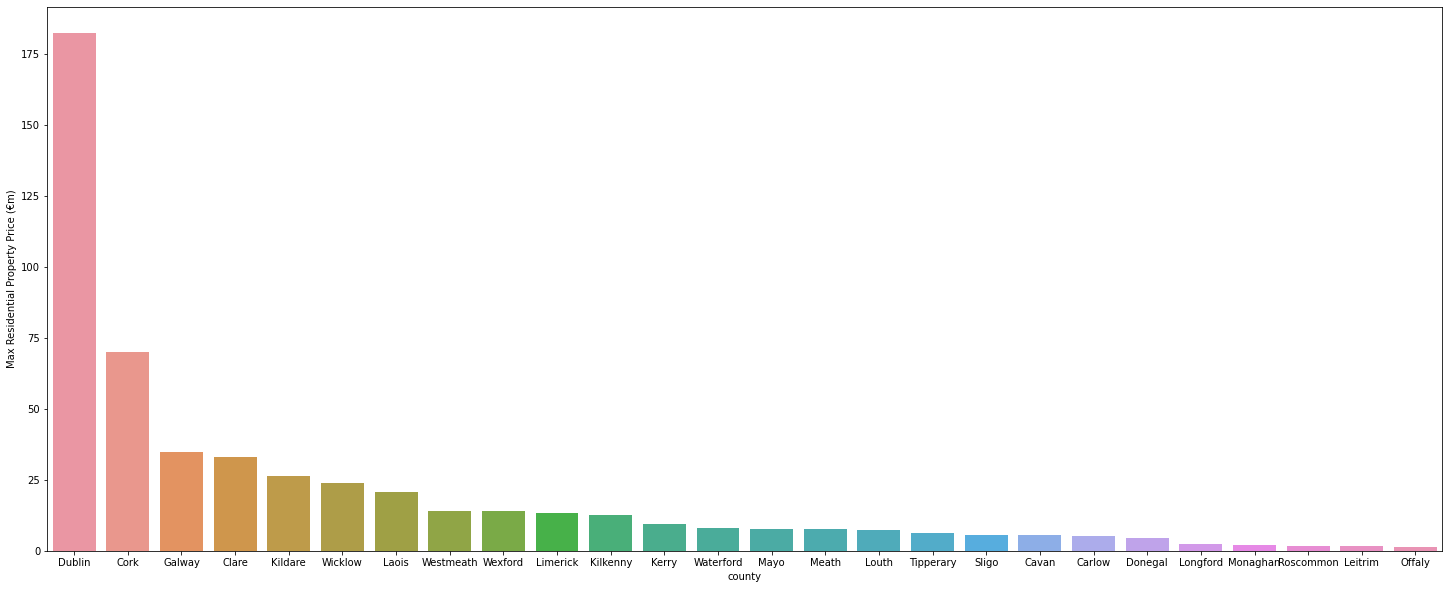

In [31]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.ylabel('Max Residential Property Price (€m)')
sns.barplot(x= county_price['county'], y=  max_house_prices,order=county_price.sort_values('max_house_prices', ascending =False).county )
plt.show()

In [32]:
min_house_prices = [(df_merge_col[df_merge_col['county'] == county]['price'].min()) for county in df_merge_col['county'].unique()]

In [33]:
county_price_min = pd.DataFrame(county)
county_price_min['min_house_prices'] = min_house_prices
county_price_min.rename(columns={0:'county'},inplace=True)
county_price_min

,county,min_house_prices
0,Dublin,5250
1,Laois,6000
2,Meath,5500
3,Kilkenny,5250
4,Limerick,6000
5,Carlow,7500
6,Cork,5031
7,Clare,5987
8,Sligo,5177
9,Cavan,5412


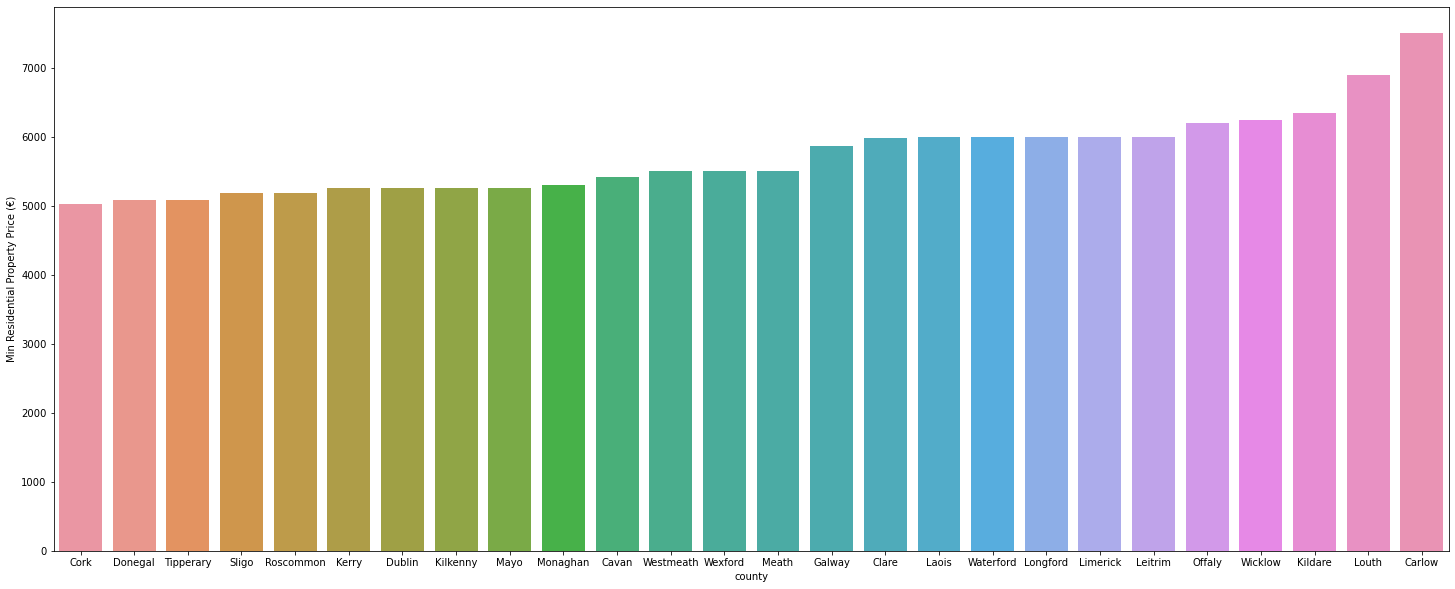

In [34]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.ylabel('Min Residential Property Price (€)')
sns.barplot(x=county_price_min['county'], y= min_house_prices, order=county_price_min.sort_values('min_house_prices').county )
plt.show()

In [35]:
property_sizes = np.delete(df_merge_col['property_size_description'].unique(), 0)
property_sizes

array(['greater than or equal to 38 sq metres and less than 125 sq metres',
       'greater than 125 sq metres', 'less than 38 sq metres',
       'greater than or equal to 125 sq metres'], dtype=object)

In [36]:
median_per_property_size = [df_merge_col['price'][df_merge_col['property_size_description']==property_size].median() for property_size in property_sizes]

In [37]:
median_per_property_size

[205000.0, 220000.0, 162832.0, 325000.0]

In [38]:
property_sizes = list(map(lambda x: x.replace('greater than 125 sq metres', '> 125 Sqm'), property_sizes))

In [39]:
property_sizes = list(map(lambda x: x.replace('greater than or equal to 38 sq metres and less than 125 sq metres', '>= 38 Sqm'), property_sizes))

In [40]:
property_sizes = list(map(lambda x: x.replace('less than 38 sq metres', '< 38 Sqm'), property_sizes))

In [41]:
property_sizes = list(map(lambda x: x.replace('greater than or equal to 125 sq metres', '>= 125 Sqm'), property_sizes))

In [42]:
property_sizes

['>= 38 Sqm', '> 125 Sqm', '< 38 Sqm', '>= 125 Sqm']

In [43]:
size_price = pd.DataFrame(property_sizes)
size_price

,0
0,>= 38 Sqm
1,> 125 Sqm
2,< 38 Sqm
3,>= 125 Sqm


In [44]:
size_price['median_per_property_size'] = median_per_property_size
size_price.rename(columns={0:'property_sizes'},inplace=True)
size_price

,property_sizes,median_per_property_size
0,>= 38 Sqm,205000.0
1,> 125 Sqm,220000.0
2,< 38 Sqm,162832.0
3,>= 125 Sqm,325000.0


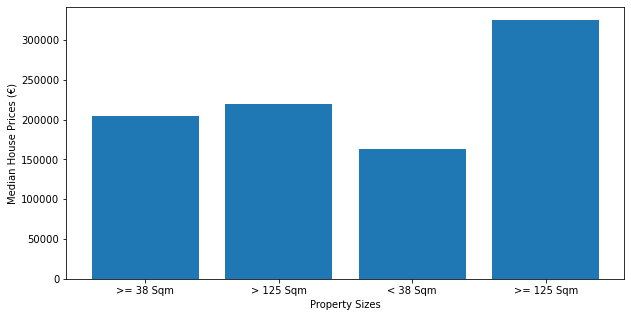

In [45]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.bar(size_price['property_sizes'], size_price['median_per_property_size'] )
#ax.set_xticklabels(labels=property_sizes,rotation=90)
plt.xlabel('Property Sizes')
#plt.xlabel(" Property Sizes, 0: <38 sqm, 1: =>38 sqm, 2: =>125 sqm")
plt.ylabel('Median House Prices (€)')
plt.show()

In [46]:
property_ = (df_merge_col['property_description'].unique())
property_

array(['Second-Hand', 'NewHouse'], dtype=object)

In [47]:
propertysize_house_prices = [(df_merge_col[df_merge_col['property_description'] == property_description]['price'].median()) for property_description in df_merge_col['property_description'].unique()]

In [48]:
propertysize_house_prices

[190000.0, 251101.0]

In [49]:
property_ = list(map(lambda x: x.replace('Second-Hand Dwelling house /Apartment', 'UsedHouse'), property_))

In [50]:
property_ = list(map(lambda x: x.replace('New Dwelling house /Apartment', 'NewHouse'), property_))

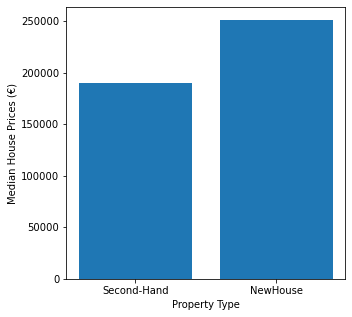

In [51]:
fig, ax = plt.subplots(figsize=(5, 5))
plt.bar(property_,propertysize_house_prices)
#ax.set_xticklabels(labels=property_,rotation=90)
plt.xlabel('Property Type')
plt.ylabel('Median House Prices (€)')
plt.show()

In [52]:
df_merge_col[df_merge_col['county'] == 'Dublin']['postal_code'].unique()

for postal_code in df_merge_col[df_merge_col['county'] == 'Dublin']['postal_code'].unique():
      print('Median house price in {}: {:.2f}k'.format(postal_code, df_merge_col['price'][df_merge_col['postal_code']==postal_code].median()/10**3))
    


Median house price in nan: nank
Median house price in Dublin 14: 495.00k
Median house price in Dublin 2: 333.00k
Median house price in Dublin 13: 315.00k
Median house price in Dublin 12: 280.00k
Median house price in Dublin 4: 480.00k
Median house price in Dublin 11: 204.00k
Median house price in Dublin 9: 330.00k
Median house price in Dublin 24: 250.00k
Median house price in Dublin 15: 274.67k
Median house price in Dublin 22: 225.00k
Median house price in Dublin 5: 335.00k
Median house price in Dublin 18: 380.00k
Median house price in Dublin 6: 535.00k
Median house price in Dublin 6w: 475.80k
Median house price in Dublin 7: 285.25k
Median house price in Dublin 16: 425.00k
Median house price in Dublin 8: 259.46k
Median house price in Dublin 3: 354.50k
Median house price in Dublin 1: 237.00k
Median house price in Dublin 17: 196.00k
Median house price in Dublin 20: 262.00k
Median house price in Dublin 10: 170.00k
Median house price in : 228.50k


In [53]:
post_codes = np.delete(df_merge_col[df_merge_col['county'] == 'Dublin']['postal_code'].unique(), 2)
post_codes

array([nan, 'Dublin 14', 'Dublin 13', 'Dublin 12', 'Dublin 4',
       'Dublin 11', 'Dublin 9', 'Dublin 24', 'Dublin 15', 'Dublin 22',
       'Dublin 5', 'Dublin 18', 'Dublin 6', 'Dublin 6w', 'Dublin 7',
       'Dublin 16', 'Dublin 8', 'Dublin 3', 'Dublin 1', 'Dublin 17',
       'Dublin 20', 'Dublin 10', ''], dtype=object)

In [54]:
median_per_postal_code = [df_merge_col['price'][df_merge_col['postal_code']==postal_code].median() for postal_code in post_codes]

median_per_postal_code = np.asarray(median_per_postal_code)
median_per_postal_code

array([     nan, 495000. , 315000. , 280000. , 480000. , 204000. ,
       330000. , 250000. , 274669.5, 225000. , 335000. , 380000. ,
       535000. , 475800. , 285250. , 425000. , 259456. , 354500. ,
       237000. , 196000. , 262000. , 170000. , 228500. ])

In [55]:
#df_merge_col['price'] = df_merge_col['price'].astype(float)
q=[]
for price in median_per_postal_code:
    x = price/10**3
    q.append(x)
    

In [56]:
q.pop(0)
q.pop(21)
post_codes =post_codes.tolist()
post_codes.pop(0)
post_codes.pop(21)

''

In [57]:
print(post_codes)

['Dublin 14', 'Dublin 13', 'Dublin 12', 'Dublin 4', 'Dublin 11', 'Dublin 9', 'Dublin 24', 'Dublin 15', 'Dublin 22', 'Dublin 5', 'Dublin 18', 'Dublin 6', 'Dublin 6w', 'Dublin 7', 'Dublin 16', 'Dublin 8', 'Dublin 3', 'Dublin 1', 'Dublin 17', 'Dublin 20', 'Dublin 10']


In [58]:
# plt.errorbar(post_codes,mean_per_postal_code, std_per_postal_code, linestyle='None', marker='*',
#plt.bar(post_codes,q)
#plt.ylabel('Median House Prices (€k)')
#plt.show()

In [59]:
print(len(q))

21


In [60]:
print(len(post_codes))

21


In [61]:
post_price = pd.DataFrame(q)

In [62]:
post_price['post_code'] = post_codes

In [63]:
post_price = post_price.dropna()

In [64]:
print(post_price)

           0  post_code
0   495.0000  Dublin 14
1   315.0000  Dublin 13
2   280.0000  Dublin 12
3   480.0000   Dublin 4
4   204.0000  Dublin 11
5   330.0000   Dublin 9
6   250.0000  Dublin 24
7   274.6695  Dublin 15
8   225.0000  Dublin 22
9   335.0000   Dublin 5
10  380.0000  Dublin 18
11  535.0000   Dublin 6
12  475.8000  Dublin 6w
13  285.2500   Dublin 7
14  425.0000  Dublin 16
15  259.4560   Dublin 8
16  354.5000   Dublin 3
17  237.0000   Dublin 1
18  196.0000  Dublin 17
19  262.0000  Dublin 20
20  170.0000  Dublin 10


In [65]:
post_price.rename(columns={0:'price'},inplace=True)

In [66]:
post_price

,price,post_code
0,495.0000,Dublin 14
1,315.0000,Dublin 13
2,280.0000,Dublin 12
3,480.0000,Dublin 4
4,204.0000,Dublin 11
5,330.0000,Dublin 9
6,250.0000,Dublin 24
7,274.6695,Dublin 15
8,225.0000,Dublin 22
9,335.0000,Dublin 5


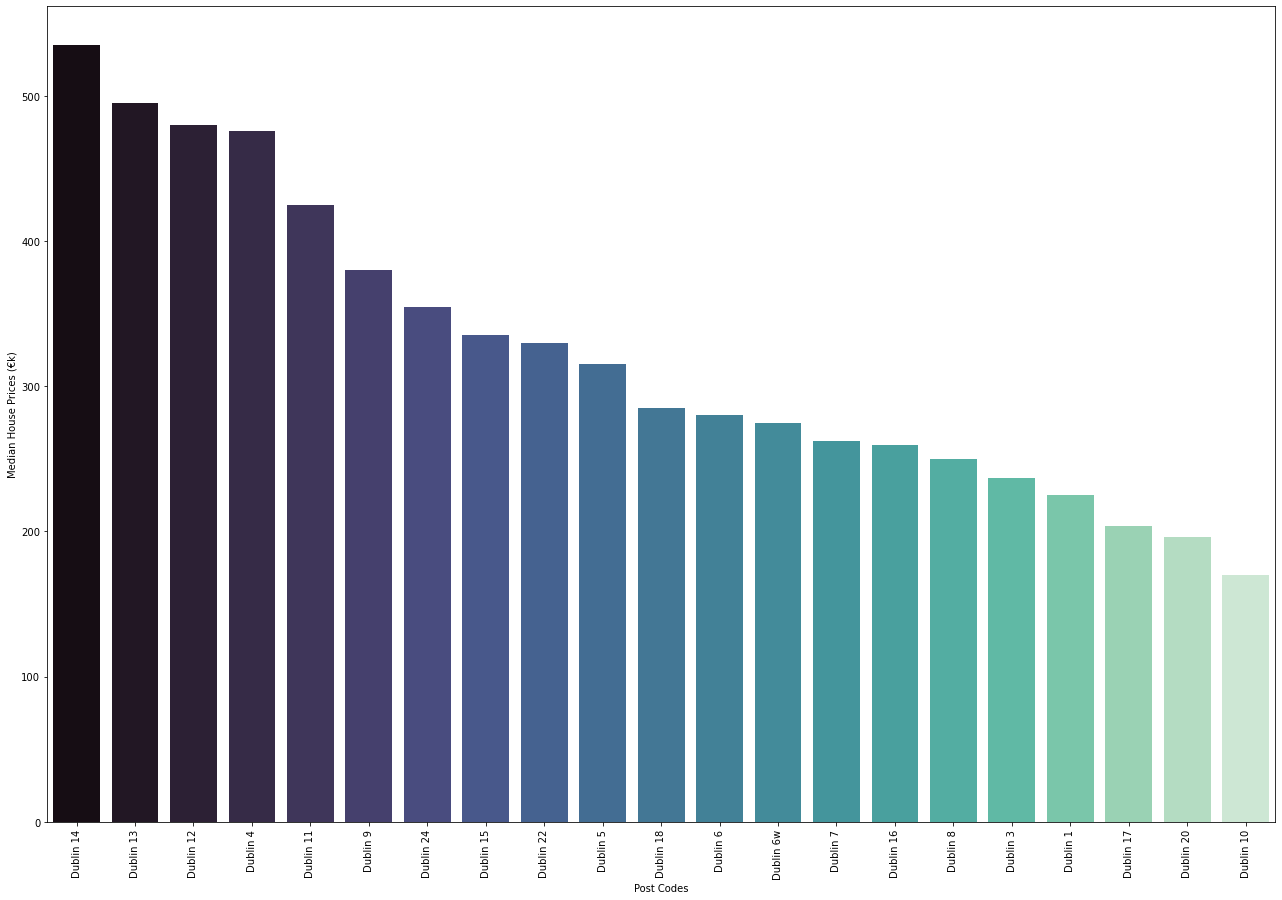

In [67]:
fig, ax = plt.subplots(figsize=(22, 15))
sns.barplot(x = post_price['post_code'],y = post_price['price'], order=post_price.sort_values('price', ascending =False).post_code, palette = 'mako')
ax.set_xticklabels(labels=post_price['post_code'],rotation=90)
#layout = ( xaxis={'categoryorder':'total descending'})
plt.xlabel('Post Codes')
plt.ylabel('Median House Prices (€k)')
plt.show()

In [68]:
counties = df_merge_col['county'].unique()
counties

array(['Dublin', 'Laois', 'Meath', 'Kilkenny', 'Limerick', 'Carlow',
       'Cork', 'Clare', 'Sligo', 'Cavan', 'Tipperary', 'Wicklow',
       'Roscommon', 'Wexford', 'Mayo', 'Donegal', 'Longford', 'Galway',
       'Offaly', 'Kildare', 'Waterford', 'Louth', 'Kerry', 'Westmeath',
       'Monaghan', 'Leitrim'], dtype=object)

In [69]:
median_per_county = [df_merge_col['price'][df_merge_col['county']==county].median() for county in counties]

median_per_county = np.asarray(median_per_county)
median_per_county

array([308370., 139995., 233480., 160000., 150000., 140000., 200000.,
       140000., 110000., 104225., 125000., 275000.,  89000., 150000.,
       110000., 101743.,  84000., 180000., 130000., 250000., 142000.,
       170000., 142500., 138000., 118000.,  87000.])

In [70]:
q=[]
for price in median_per_county:
    x = price
    q.append(x)

In [71]:
county_price = pd.DataFrame(q)

In [72]:
county_price['county'] = counties

In [73]:
county_price.rename(columns={0:'price'},inplace=True)

## Univariate Plots

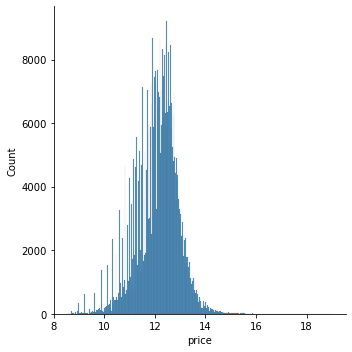

In [74]:
sns.displot(np.log(df_merge_col['price']))
plt.show()

In [75]:
df_merge_col

,date_of_sale,address,postal_code,county,price,FMP,VAT_exclusive,property_description,property_size_description,province,lat,lon,month_year,year,month,location
0,01/01/2010,"5 Braemor Drive, Churchtown, Co.Dublin",NaN,Dublin,343000,No,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,2010-01,2010,1,Dublin
1,03/01/2010,"134 Ashewood Walk, Summerhill Lane, Portlaoise",NaN,Laois,185000,No,Yes,NewHouse,greater than or equal to 38 sq metres and less...,Leinster,52.998458,-7.398034,2010-03,2010,1,Outside
2,04/01/2010,"1 Meadow Avenue, Dundrum, Dublin 14",NaN,Dublin,438500,No,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,2010-04,2010,1,Dublin
3,04/01/2010,"1 The Haven, Mornington",NaN,Meath,400000,No,No,Second-Hand,NaN,Leinster,53.649784,-6.588529,2010-04,2010,1,Outside
4,04/01/2010,"11 Melville Heights, Kilkenny",NaN,Kilkenny,160000,No,No,Second-Hand,NaN,Leinster,52.651022,-7.248495,2010-04,2010,1,Outside
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
516581,28/01/2022,"Lacken, Multyfarnham, Mullingar",NaN,Westmeath,305000,No,No,Second-Hand,NaN,Leinster,53.557790,-7.347856,2022-01,2022,1,Outside
516582,28/01/2022,"Larch Hill, Colman, Fethard",NaN,Tipperary,300000,No,No,Second-Hand,NaN,Munster,52.684821,-7.898128,2022-01,2022,1,Outside
516583,28/01/2022,"Sherrys Wood, Bellewstown, Co Meath",NaN,Meath,450000,No,No,Second-Hand,NaN,Leinster,53.649784,-6.588529,2022-01,2022,1,Outside
516584,28/01/2022,"St Judes, Stoneyford, Kilkenny",NaN,Kilkenny,242000,No,No,Second-Hand,NaN,Leinster,52.651022,-7.248495,2022-01,2022,1,Outside


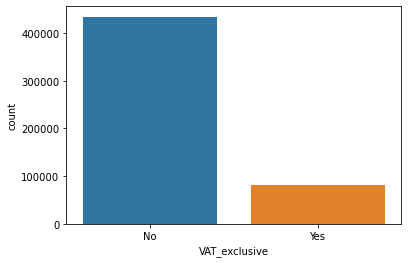

In [76]:
sns.countplot(x='VAT_exclusive', data=df_merge_col)
plt.show()

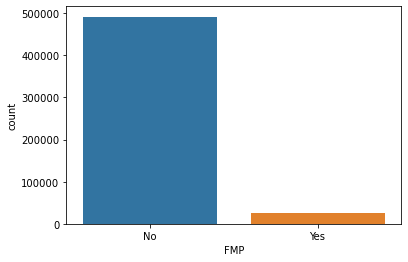

In [77]:
sns.countplot(x='FMP', data=df_merge_col)
plt.show()

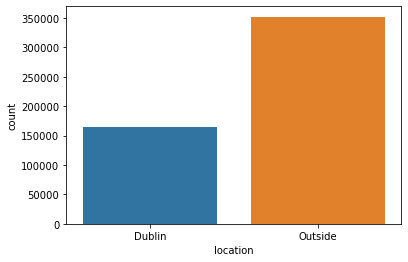

In [78]:
sns.countplot(x='location', data=df_merge_col)
plt.show()

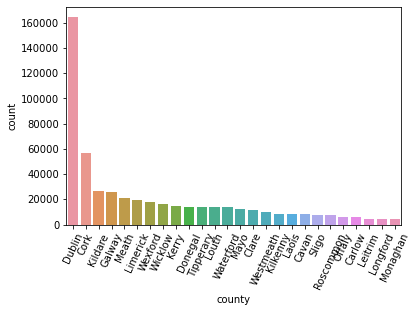

In [79]:
sns.countplot(x='county', data=df_merge_col, order = df_merge_col['county'].value_counts().index)
locs, labels = plt.xticks()
plt.setp(labels, rotation=65)
plt.show()


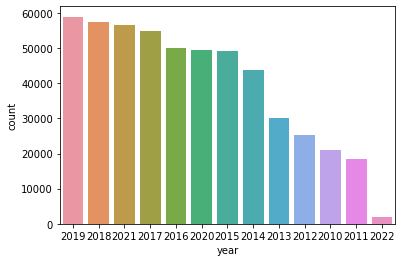

In [80]:
sns.countplot(x='year', data=df_merge_col, order = df_merge_col['year'].value_counts().index)
plt.show()

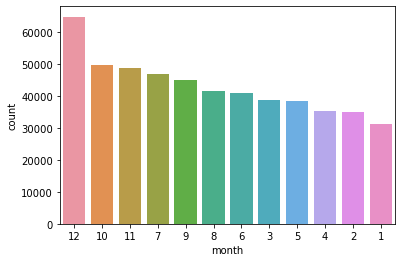

In [81]:
sns.countplot(x='month', data=df_merge_col, order = df_merge_col['month'].value_counts().index)
plt.show()

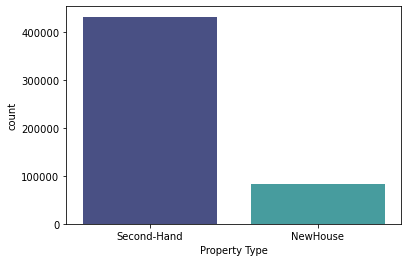

In [82]:
sns.countplot(x='property_description', data=df_merge_col, palette = 'mako')
plt.xlabel('Property Type')
plt.show()

In [83]:
df_merge_col['property_size_description'] = df_merge_col['property_size_description'].replace(['greater than or equal to 38 sq metres and less than 125 sq metres','greater than 125 sq metres', 'less than 38 sq metres','greater than or equal to 125 sq metres'],['>=38 Sqm','>125 Sqm','<38 Sqm','>125 Sqm'])

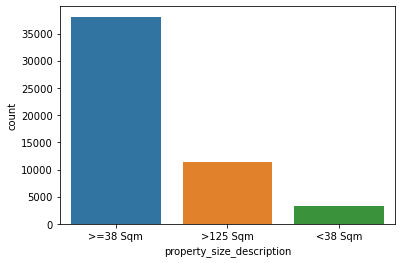

In [84]:
sns.countplot(x='property_size_description', data=df_merge_col)
plt.show()

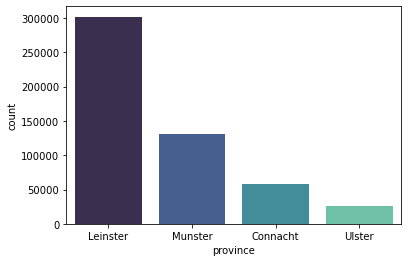

In [85]:
sns.countplot(x='province', data=df_merge_col, palette = 'mako')
#sns.color_palette("light:#5A9", as_cmap=True)
plt.show()

## Bivariate Plots

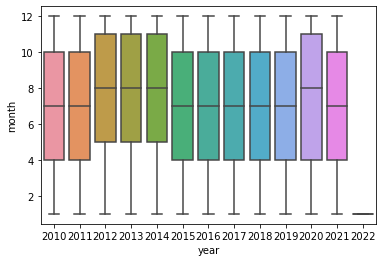

In [86]:
sns.boxplot(x='year', y='month', data=df_merge_col)
plt.show()


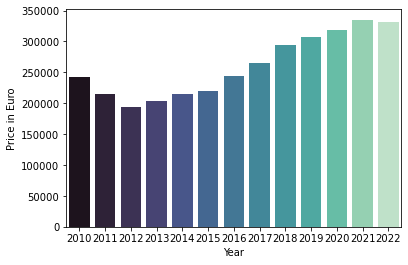

In [87]:
sns.barplot(x='year', y='price', data=df_merge_col, ci=None, palette = 'mako')
plt.xlabel('Year')
plt.ylabel('Price in Euro')
plt.show()


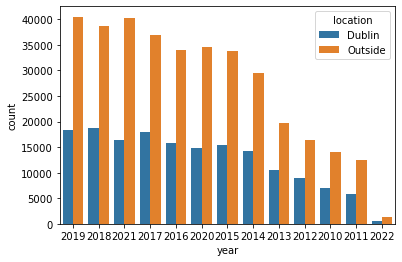

In [88]:

sns.countplot(x='year',hue='location', data=df_merge_col, order = df_merge_col['year'].value_counts().index)
plt.show()


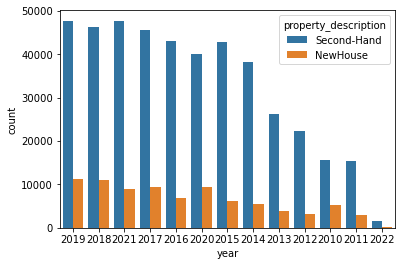

In [89]:
sns.countplot(x='year',hue='property_description', data=df_merge_col, order = df_merge_col['year'].value_counts().index)
plt.show()

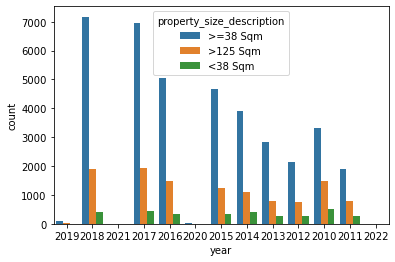

In [90]:
sns.countplot(x='year',hue='property_size_description', data=df_merge_col, order = df_merge_col['year'].value_counts().index)
plt.show()

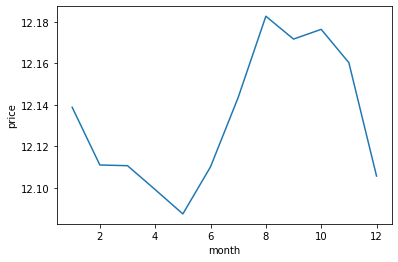

In [91]:
sns.lineplot(x='month', y=np.log(df_merge_col['price']), data=df_merge_col, ci=None)
plt.show()

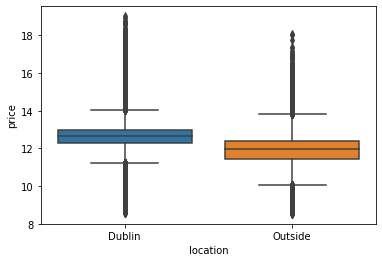

In [92]:
#  bivariate with Price
sns.boxplot(x='location', y=np.log(df_merge_col['price']), data=df_merge_col)
plt.show()


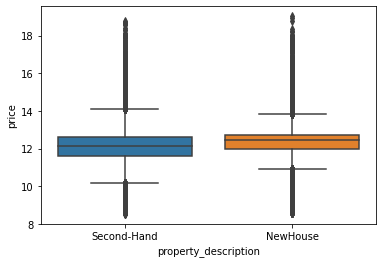

In [93]:
sns.boxplot(x='property_description', y=np.log(df_merge_col['price']), data=df_merge_col)
plt.show()

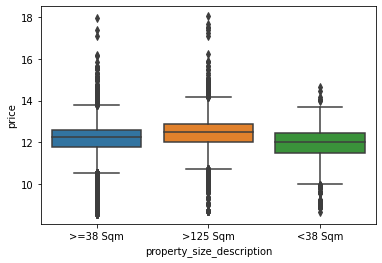

In [94]:
sns.boxplot(x='property_size_description', y=np.log(df_merge_col['price']), data=df_merge_col)
plt.show()

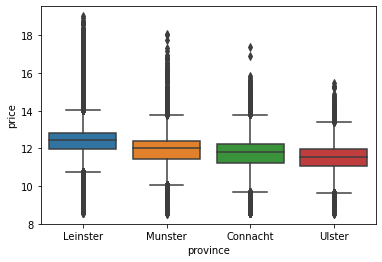

In [95]:
sns.boxplot(x='province', y=np.log(df_merge_col['price']), data=df_merge_col)
plt.show()

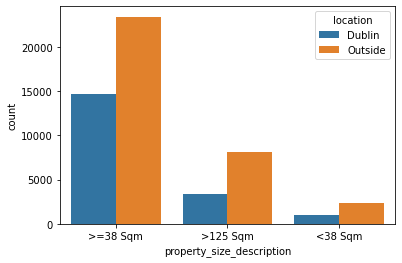

In [96]:
# with location
sns.countplot(x='property_size_description',hue='location', data=df_merge_col, order = df_merge_col['property_size_description'].value_counts().index)
plt.show()

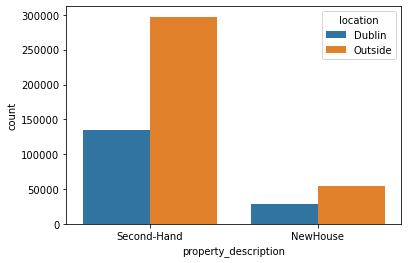

In [97]:
sns.countplot(x='property_description',hue='location', data=df_merge_col, order = df_merge_col['property_description'].value_counts().index)
plt.show()

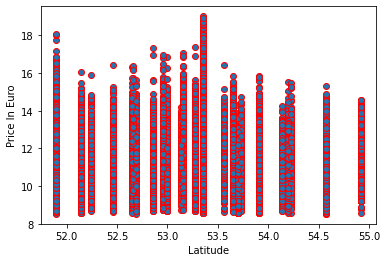

In [98]:
# geogrpahy and price
plt.scatter(df_merge_col['lat'],np.log(df_merge_col['price']) ,edgecolors='r')
plt.xlabel('Latitude')
plt.ylabel('Price In Euro')
plt.show()

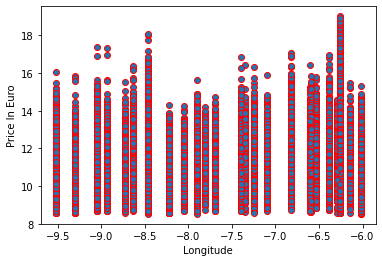

In [99]:
plt.scatter(df_merge_col['lon'],np.log(df_merge_col['price']) ,edgecolors='r')
plt.xlabel('Longitude')
plt.ylabel('Price In Euro')
plt.show()

## Multivariate

In [100]:
#multivariate
#sns.pairplot(df_merge_col)
#plt.show()


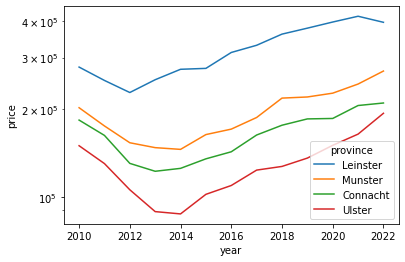

In [101]:
p1 = sns.lineplot(data=df_merge_col, x="year", y="price",hue='province', ci=None)
p1.set_yscale('log')

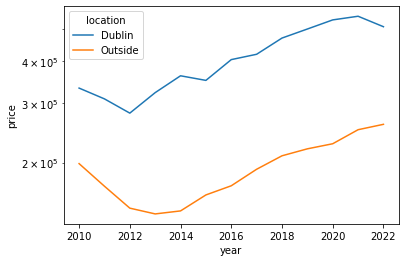

In [102]:
p1 = sns.lineplot(data=df_merge_col, x="year", y="price",hue='location', ci=None)
p1.set_yscale('log')

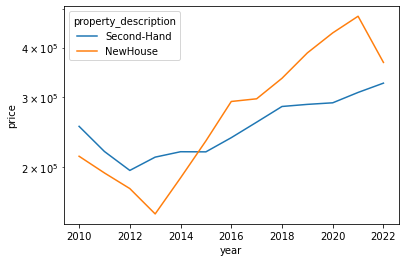

In [103]:
p1 = sns.lineplot(data=df_merge_col, x="year", y="price",hue='property_description',ci=None)
p1.set_yscale('log')

In [104]:

#sns.pairplot(df_merge_col,
# x_vars=["year", "price"],
 #y_vars=["year", "price"],
 #hue="location")
#plt.show()


In [105]:
#sns.pairplot(df_merge_col,
# x_vars=["year", "price"],
# y_vars=["year", "price"],
# hue="province")
#plt.show()

In [106]:
#sns.pairplot(df_merge_col,
# x_vars=["year", "price"],
# y_vars=["year", "price"],
# hue="property_description")
#plt.show()

In [107]:
#sns.pairplot(df_merge_col,
# x_vars=["year", "price"],
# y_vars=["year", "price"],
# hue="property_size_description")
#plt.show()

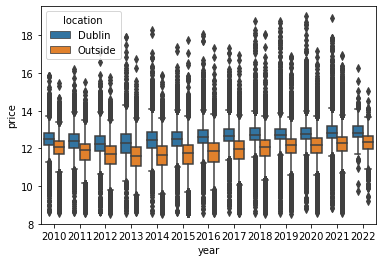

In [108]:

sns.boxplot(x='year', y=np.log(df_merge_col['price']), hue='location', data=df_merge_col)
plt.show()


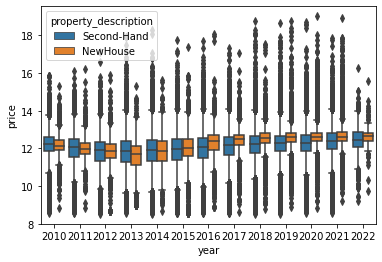

In [109]:
sns.boxplot(x='year', y=np.log(df_merge_col['price']), hue='property_description', data=df_merge_col)
plt.show()


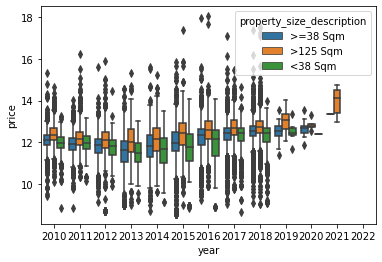

In [110]:
sns.boxplot(x='year', y=np.log(df_merge_col['price']), hue='property_size_description', data=df_merge_col)
plt.show()

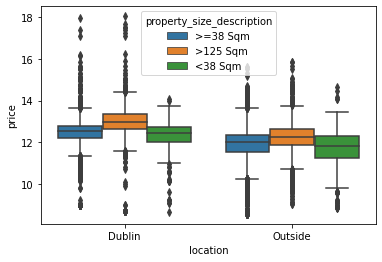

In [111]:
sns.boxplot(x='location', y=np.log(df_merge_col['price']), hue='property_size_description', data=df_merge_col)
plt.show()

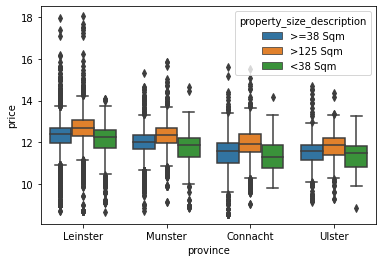

In [112]:
sns.boxplot(x='province', y=np.log(df_merge_col['price']), hue='property_size_description', data=df_merge_col)
plt.show()

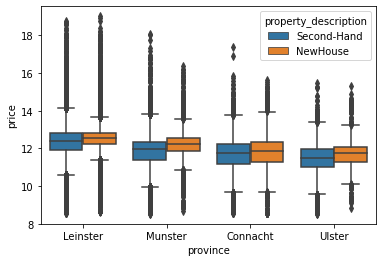

In [113]:
sns.boxplot(x='province', y=np.log(df_merge_col['price']), hue='property_description', data=df_merge_col)
plt.show()

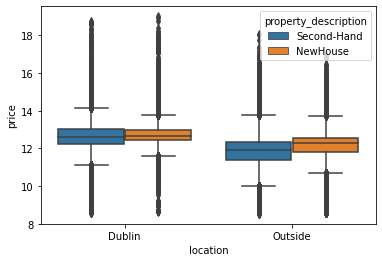

In [114]:
sns.boxplot(x='location', y=np.log(df_merge_col['price']), hue='property_description', data=df_merge_col)
plt.show()

In [115]:
#df_merge_col.to_csv("PRP.csv", index=False)

## Initail Analyses

## MLR 

In [157]:
rppr1 = df_merge_col.copy()
rppr1.drop(columns =['month_year','date_of_sale','address','VAT_exclusive','FMP','postal_code','county'], inplace=True)

In [158]:
#pd.get_dummies(rppr1["location"])
rppr1["location_Dublin"]=pd.get_dummies(rppr1["location"])["Dublin"]


In [159]:
#pd.get_dummies(rppr1["property_description"])
rppr1["property_new"]=pd.get_dummies(rppr1["property_description"])["NewHouse"]

In [160]:
#pd.get_dummies(rppr1["province"])
#rppr1["provinces_Leinster"]=pd.get_dummies(rppr["province"])["Leinster"]
rppr1["provinces_connacht"]=pd.get_dummies(rppr1["province"])["Connacht"]
rppr1["provinces_Ulster"]=pd.get_dummies(rppr1["province"])["Ulster"]
rppr1["provinces_munster"]=pd.get_dummies(rppr1["province"])["Munster"]

In [161]:
from numpy import sqrt
log_price = np.log(rppr1['price'])
transform  = sqrt(log_price)

In [162]:
X = rppr1[["location_Dublin","property_new","provinces_connacht", "provinces_Ulster", "provinces_munster","year", "lat","lon"]]
X = sm.add_constant(X)
y = transform
#X.head(20)

In [163]:
model_full_mlr = sm.OLS(y, X).fit()

In [164]:

#fitted values
model_fitted_vals = model_full_mlr.fittedvalues
#model residuals
model_residuals = model_full_mlr.resid
#standardised residuals
model_norm_residuals = model_full_mlr.get_influence().resid_studentized_internal

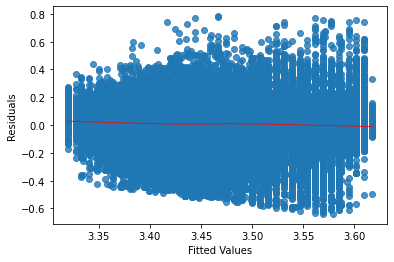

In [165]:
sns.regplot(x=model_fitted_vals,y=model_residuals,
 ci=False,lowess=True,
 line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

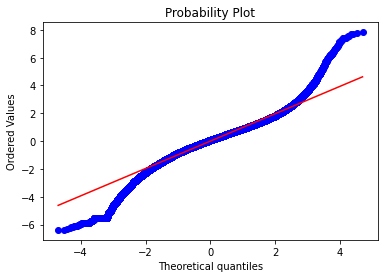

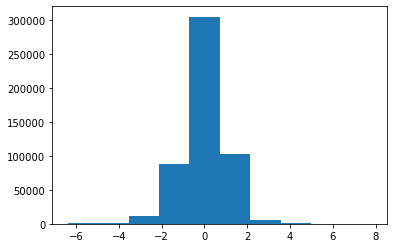

In [166]:
stats.probplot(model_norm_residuals, plot=sns.mpl.pyplot)
plt.show()

plt.hist(model_norm_residuals)
plt.show()

In [167]:
from statsmodels.formula.api import ols
model_full_mlr1 = ols('log_price ~ C(year)+C(province)+C(location)+C(property_description)+lat+lon', data=rppr1).fit()
model_full_mlr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.100e+04
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:54:07   Log-Likelihood:            -5.3530e+05
No. Observations:              516586   AIC:                         1.071e+06
Df Residuals:                  516566   BIC:                         1.071e+06
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 24.4997      0.158    154.612      0.000      24.189      24.810
C(year)[T.2011]                           -0.1556      0.007    -22.578      0.000      -0.169      -0.142
C(year)[T.2012]                           -0.3277      0.006    -51.423      0.000      -0.340      -0.315
C(year)[T.2013]                           -0.3843      0.006    -62.608      0.000      -0.396      -0.372
C(year)[T.2014]                           -0.2757      0.006    -48.036      0.000      -0.287      -0.264
C(year)[T.2015]                           -0.1998      0.006    -35.462      0.000      -0.211      -0.189
C(year)[T.2016]                           -0.0994      0.006    -17.697      0.000      -0.110      -0.088
C(year)[T.2017]                            0.0053      0.006      0.961      0.337      -0.006       0.016
C(year)[T.2018]                            0.0813      0.006     14.776      0.000       0.071       0.092
C(year)[T.2019]                            0.1339      0.005     24.414      0.000       0.123       0.145
C(year)[T.2020]                            0.1685      0.006     29.968      0.000       0.157       0.180
C(year)[T.2021]                            0.2643      0.006     47.889      0.000       0.253       0.275
C(year)[T.2022]                            0.3318      0.016     20.133      0.000       0.300       0.364
C(province)[T.Leinster]                    0.0822      0.006     13.488      0.000       0.070       0.094
C(province)[T.Munster]                    -0.1322      0.005    -24.260      0.000      -0.143      -0.122
C(province)[T.Ulster]                     -0.2318      0.009    -26.911      0.000      -0.249      -0.215
C(location)[T.Outside]                    -0.6043      0.003   -208.945      0.000      -0.610      -0.599
C(property_description)[T.Second-Hand]    -0.1519      0.003    -58.619      0.000      -0.157      -0.147
lat                                       -0.2125      0.003    -73.204      0.000      -0.218      -0.207
lon                                        0.0710      0.002     29.802      0.000       0.066       0.076
==============================================================================
Omnibus:                    39195.381   Durbin-Watson:                   1.850
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           166521.804
Skew:                          -0.270   Prob(JB):                         0.00
Kurtosis:                       5.729   Cond. No.                     8.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.96e+03. Thi

In [170]:
#model_full_mlr.summary()

A random sample of 9423 obsevrations is seleceted from the whole data for statistical analyses.

In [128]:
# 9423 random sample
rppr_sub = df_merge_col.sample(n=9423, random_state=3)
rppr_sub

,date_of_sale,address,postal_code,county,price,FMP,VAT_exclusive,property_description,property_size_description,province,lat,lon,month_year,year,month,location
91109,10/12/2013,"Tainchel, Ashtown Lower, Roundwood",NaN,Wicklow,297500,No,No,Second-Hand,NaN,Leinster,52.958147,-6.381971,2013-10,2013,12,Outside
423771,08/05/2020,"Greenogue, Kilsallaghan, Co Meath",NaN,Meath,315000,No,No,Second-Hand,NaN,Leinster,53.649784,-6.588529,2020-08,2020,5,Outside
442477,16/10/2020,"6 The Gallops, Coolcots Lane, Wexford",NaN,Wexford,131000,No,No,Second-Hand,NaN,Leinster,52.460187,-6.606516,2020-10,2020,10,Outside
343689,04/12/2018,"5 Eden Rd, Birr, Offaly",NaN,Offaly,80000,No,No,Second-Hand,NaN,Leinster,53.136172,-7.810341,2018-04,2018,12,Outside
421939,16/04/2020,"69 Castleland Park Way, Balbriggan, County Dublin",NaN,Dublin,268722,No,Yes,NewHouse,NaN,Leinster,53.349764,-6.260273,2020-04,2020,4,Dublin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404354,11/12/2019,"72 St Patricks Rd, Walkinstown Dublin 12, Dublin",Dublin 12,Dublin,53750,Yes,No,Second-Hand,NaN,Leinster,53.349764,-6.260273,2019-11,2019,12,Dublin
218218,05/09/2016,"33 Drury Mills, Saggart, Co Dublin",NaN,Dublin,229075,No,Yes,NewHouse,>=38 Sqm,Leinster,53.349764,-6.260273,2016-05,2016,9,Dublin
463833,17/02/2021,"12 Grand Canal Wood, Allenwood",NaN,Kildare,267000,No,Yes,NewHouse,NaN,Leinster,53.154364,-6.818418,2021-02,2021,2,Outside
161348,02/07/2015,"The Gables, Kilwogan Lane, Celbridge",NaN,Kildare,470000,No,No,Second-Hand,NaN,Leinster,53.154364,-6.818418,2015-02,2015,7,Outside


In [129]:
#log_price = np.log(rppr_sub['price'])

## SLR

In [130]:

# Try SLR
X = rppr_sub["year"]
X = sm.add_constant(X)
y = np.log(rppr_sub['price'])
model_slr = sm.OLS(y, X).fit()
#fitted values
model_fitted_vals = model_slr.fittedvalues
#model residuals
model_residuals = model_slr.resid
#standardised residuals
model_norm_residuals = model_slr.get_influence().resid_studentized_internal


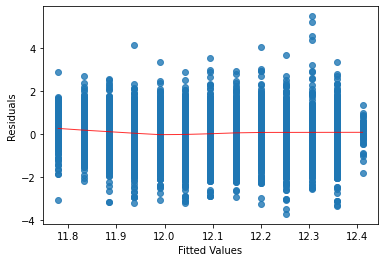

In [131]:

sns.regplot(x=model_fitted_vals,y=model_residuals,
ci=False,lowess=True,
line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


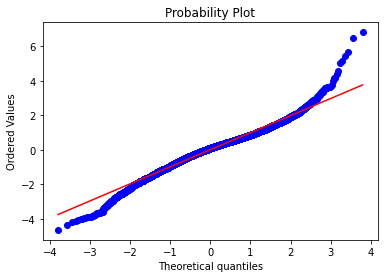

In [132]:

stats.probplot(model_norm_residuals, plot=sns.mpl.pyplot)
plt.show()


In [133]:

X = rppr_sub["lat"]
X = sm.add_constant(X)
y = rppr_sub['price']
model_slr = sm.OLS(y, X).fit()
#fitted values
model_fitted_vals1 = model_slr.fittedvalues
#model residuals
model_residuals1 = model_slr.resid
#standardised residuals
model_norm_residuals1 = model_slr.get_influence().resid_studentized_internal


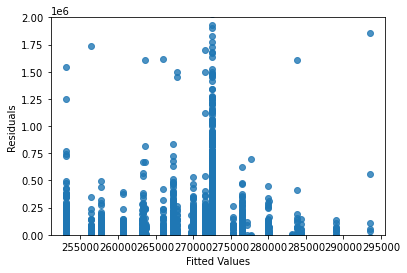

In [134]:

sns.regplot(x=model_fitted_vals1,y=model_residuals1,
ci=False,lowess=True,
line_kws={'color': 'red', 'lw': 1, 'alpha': 0.25})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.ylim(0,2000000)
plt.show()


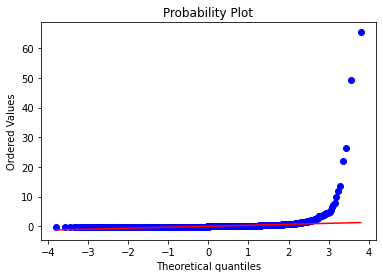

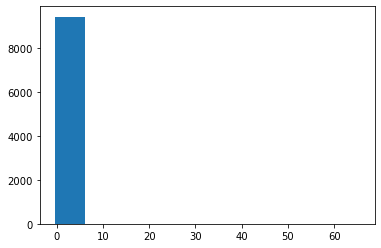

In [156]:
stats.probplot(model_norm_residuals1, plot=sns.mpl.pyplot)
#plt.ylim(0,30)
plt.show()

plt.hist(model_norm_residuals1)
plt.show()

These are not meeting the assumptions. So I am not proceeding with SLR.

Dropping the address, latitude and longitude and date column since it is not using in following analysis.

## ANOVA

In [136]:
rppr = rppr_sub.copy()
rppr.drop(columns =['month_year', 'lat','lon','date_of_sale','address','VAT_exclusive','FMP','postal_code','county'], inplace=True)

In [137]:
rppr

,price,property_description,property_size_description,province,year,month,location
91109,297500,Second-Hand,NaN,Leinster,2013,12,Outside
423771,315000,Second-Hand,NaN,Leinster,2020,5,Outside
442477,131000,Second-Hand,NaN,Leinster,2020,10,Outside
343689,80000,Second-Hand,NaN,Leinster,2018,12,Outside
421939,268722,NewHouse,NaN,Leinster,2020,4,Dublin
...,...,...,...,...,...,...,...
404354,53750,Second-Hand,NaN,Leinster,2019,12,Dublin
218218,229075,NewHouse,>=38 Sqm,Leinster,2016,9,Dublin
463833,267000,NewHouse,NaN,Leinster,2021,2,Outside
161348,470000,Second-Hand,NaN,Leinster,2015,7,Outside


In [138]:
pd.get_dummies(rppr["location"])
rppr["location_Dublin"]=pd.get_dummies(rppr["location"])["Dublin"]

In [139]:
pd.get_dummies(rppr["property_description"])
rppr["property_new"]=pd.get_dummies(rppr["property_description"])["NewHouse"]

In [140]:
#rpp = rppr[['price','year']]
from numpy import sqrt
log_price = np.log(rppr['price'])
transform = series = sqrt(log_price)

In [141]:
log_price = np.log(rppr['price'])


In [142]:
d1= pd.crosstab(index=rppr['location'], columns=rppr["year"], margins=True)
d1

year,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,All
location,,,,,,,,,,,,,,
Dublin,121,100,165,195,222,271,268,326,369,328,277,290,15,2947
Outside,243,197,314,374,489,645,577,753,753,764,611,729,27,6476
All,364,297,479,569,711,916,845,1079,1122,1092,888,1019,42,9423


In [143]:
## property_size_description variable has lots of NaN values and hence it is not considered.

In [144]:

#perform two-way ANOVA without interaction
model2t = ols('log_price~ C(year) + C(location) + C(property_description) + C(province)', data=rppr_sub).fit()
#fitted values
model_fitted_vals2 = model2t.fittedvalues
#model residuals
model_residuals2 = model2t.resid
#standardised residuals
model_norm_residuals2t = model2t.get_influence().resid_studentized_internal


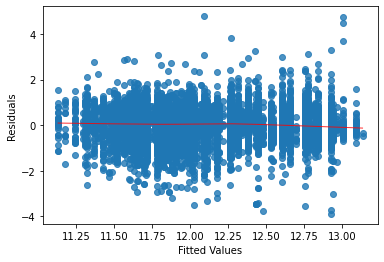

In [145]:

sns.regplot(x=model_fitted_vals2,y=model_residuals2,
ci=False,lowess=True,
line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()


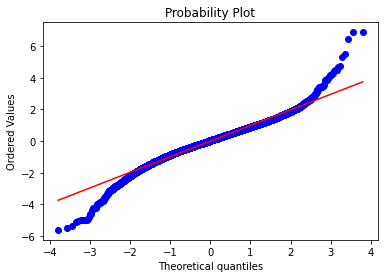

In [146]:

stats.probplot(model_norm_residuals2t, plot=sns.mpl.pyplot)
plt.show()

In [147]:
sm.stats.anova_lm(model2t, typ=2)


,sum_sq,df,F,PR(>F)
C(year),374.184533,12.0,64.743305,4.008145e-152
C(location),592.285002,1.0,1229.761838,2.604806e-253
C(property_description),35.376031,1.0,73.451281,1.194297e-17
C(province),131.985320,3.0,91.347076,2.880052e-58
Residual,4529.690442,9405.0,NaN,NaN


In [148]:

model2t.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     217.6
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:47:43   Log-Likelihood:                -9919.5
No. Observations:                9423   AIC:                         1.987e+04
Df Residuals:                    9405   BIC:                         2.000e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 12.5072      0.048    261.978      0.000      12.414      12.601
C(year)[T.2011]                           -0.0936      0.054     -1.723      0.085      -0.200       0.013
C(year)[T.2012]                           -0.3105      0.048     -6.424      0.000      -0.405      -0.216
C(year)[T.2013]                           -0.3587      0.047     -7.686      0.000      -0.450      -0.267
C(year)[T.2014]                           -0.2492      0.045     -5.561      0.000      -0.337      -0.161
C(year)[T.2015]                           -0.1809      0.043     -4.200      0.000      -0.265      -0.096
C(year)[T.2016]                           -0.0222      0.044     -0.509      0.611      -0.108       0.063
C(year)[T.2017]                            0.0294      0.042      0.699      0.485      -0.053       0.112
C(year)[T.2018]                            0.1305      0.042      3.116      0.002       0.048       0.213
C(year)[T.2019]                            0.1475      0.042      3.509      0.000       0.065       0.230
C(year)[T.2020]                            0.2143      0.043      4.956      0.000       0.130       0.299
C(year)[T.2021]                            0.2978      0.042      7.012      0.000       0.215       0.381
C(year)[T.2022]                            0.3406      0.113      3.011      0.003       0.119       0.562
C(location)[T.Outside]                    -0.6631      0.019    -35.068      0.000      -0.700      -0.626
C(property_description)[T.Second-Hand]    -0.1662      0.019     -8.570      0.000      -0.204      -0.128
C(province)[T.Leinster]                    0.2848      0.025     11.415      0.000       0.236       0.334
C(province)[T.Munster]                     0.1999      0.025      7.949      0.000       0.151       0.249
C(province)[T.Ulster]                     -0.1873      0.037     -5.046      0.000      -0.260      -0.115
==============================================================================
Omnibus:                      746.293   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3395.607
Skew:                          -0.257   Prob(JB):                         0.00
Kurtosis:                       5.896   Cond. No.                         32.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [149]:
#perform two-way ANOVA without interaction
model3 = ols('log_price~ C(year) + C(location) + C(property_description)',
 data=rppr_sub).fit()
#fitted values
model_fitted_vals3 = model3.fittedvalues
#model residuals
model_residuals3 = model3.resid
#standardised residuals
model_norm_residuals3 = model3.get_influence().resid_studentized_internal

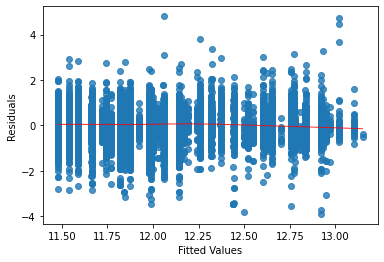

In [150]:
sns.regplot(x=model_fitted_vals3,y=model_residuals3,
ci=False,lowess=True,
line_kws={'color': 'red', 'lw': 1, 'alpha': 0.8})
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

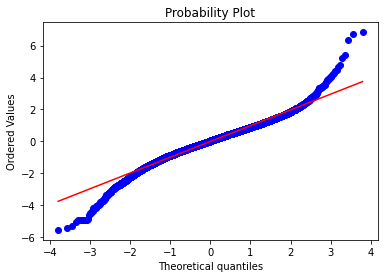

In [151]:
stats.probplot(model_norm_residuals3, plot=sns.mpl.pyplot)
plt.show()

In [152]:
model3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     237.8
Date:                Mon, 22 Aug 2022   Prob (F-statistic):               0.00
Time:                        10:47:43   Log-Likelihood:                -10055.
No. Observations:                9423   AIC:                         2.014e+04
Df Residuals:                    9408   BIC:                         2.025e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 12.8049      0.041    313.873      0.000      12.725      12.885
C(year)[T.2011]                           -0.1028      0.055     -1.867      0.062      -0.211       0.005
C(year)[T.2012]                           -0.3060      0.049     -6.242      0.000      -0.402      -0.210
C(year)[T.2013]                           -0.3663      0.047     -7.738      0.000      -0.459      -0.273
C(year)[T.2014]                           -0.2551      0.045     -5.612      0.000      -0.344      -0.166
C(year)[T.2015]                           -0.1826      0.044     -4.179      0.000      -0.268      -0.097
C(year)[T.2016]                           -0.0244      0.044     -0.552      0.581      -0.111       0.062
C(year)[T.2017]                            0.0271      0.043      0.635      0.526      -0.057       0.111
C(year)[T.2018]                            0.1294      0.042      3.047      0.002       0.046       0.213
C(year)[T.2019]                            0.1446      0.043      3.392      0.001       0.061       0.228
C(year)[T.2020]                            0.2137      0.044      4.872      0.000       0.128       0.300
C(year)[T.2021]                            0.2957      0.043      6.867      0.000       0.211       0.380
C(year)[T.2022]                            0.3439      0.115      2.997      0.003       0.119       0.569
C(location)[T.Outside]                    -0.7802      0.016    -49.819      0.000      -0.811      -0.749
C(property_description)[T.Second-Hand]    -0.1791      0.020     -9.127      0.000      -0.218      -0.141
==============================================================================
Omnibus:                      725.608   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3022.455
Skew:                          -0.280   Prob(JB):                         0.00
Kurtosis:                       5.717   Cond. No.                         30.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""